In [52]:

import pandas as pd
import matplotlib as plt

#scope: The scope for this project is to analyse which factors are most 
#related to the probabality of a certain species going into extinction. 
#there are many species from many different parks and we are going to find out patterns that are most
#related to the conservation status of each species
# from the Data we will connect categories of animals to their conservation status, and we will also make a connection
# between the parks and the number of animals in each conservation status. 




# first of all, we do an visual analysis of the tables that represent the data frame

obs = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')

print(obs.head())
print(obs.describe())
print(species_info.head())
print(species_info.describe())
print(species_info.conservation_status.unique())



            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  


In [9]:
# Now we are choosing only the data from the species table that has information on the onservation status of the species

species_info_nona = species_info.dropna(subset = ['conservation_status'])
print(species_info_nona.head())

   category            scientific_name       common_names conservation_status
7    Mammal              Canis latrans             Coyote  Species of Concern
8    Mammal                Canis lupus          Gray Wolf          Endangered
9    Mammal                Canis rufus           Red Wolf          Endangered
29   Mammal           Eptesicus fuscus      Big Brown Bat  Species of Concern
30   Mammal  Lasionycteris noctivagans  Silver-Haired Bat  Species of Concern


In [64]:
# Here, we manipulate the data so that we might have the count by conservation status by category, and so we loose
# the scientific name of each species.

species_grouped = species_info_nona.groupby(['category','conservation_status']).size().reset_index()
species_grouped.rename(columns = {species_grouped.columns[-1]:'count'}, inplace = True)
print(species_grouped)




             category conservation_status  count
0           Amphibian          Endangered      1
1           Amphibian  Species of Concern      4
2           Amphibian          Threatened      2
3                Bird          Endangered      4
4                Bird         In Recovery      3
5                Bird  Species of Concern     72
6                Fish          Endangered      3
7                Fish  Species of Concern      4
8                Fish          Threatened      4
9              Mammal          Endangered      7
10             Mammal         In Recovery      1
11             Mammal  Species of Concern     28
12             Mammal          Threatened      2
13  Nonvascular Plant  Species of Concern      5
14            Reptile  Species of Concern      5
15     Vascular Plant          Endangered      1
16     Vascular Plant  Species of Concern     43
17     Vascular Plant          Threatened      2


In [65]:

# here, we do a rotation of the data such that The numers of amphibains, birds... are one for each column of a row
# that has the conservation_status for each. We also reset the index

summary_species=species_grouped.pivot(index = 'conservation_status', columns = ['category'], values = 'count')

summary_species['conservation_status'] = summary_species.index
print(summary_species)

category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                 1.0   4.0   3.0     7.0                NaN   
In Recovery                NaN   3.0   NaN     1.0                NaN   
Species of Concern         4.0  72.0   4.0    28.0                5.0   
Threatened                 2.0   NaN   4.0     2.0                NaN   

category             Reptile  Vascular Plant conservation_status  
conservation_status                                               
Endangered               NaN             1.0          Endangered  
In Recovery              NaN             NaN         In Recovery  
Species of Concern       5.0            43.0  Species of Concern  
Threatened               NaN             2.0          Threatened  


<AxesSubplot:title={'center':'Stacked Bar Graph by dataframe'}, xlabel='conservation_status'>

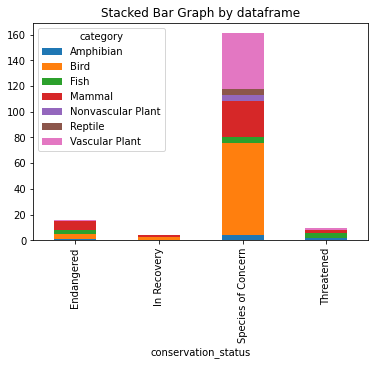

In [67]:
# here we basically do a Stacked bar plot where we can see the representativity of each group of species in each 
# conservation status. 


summary_species.plot(x='conservation_status', kind='bar', stacked=True,
        title='Stacked Bar Graph by dataframe')



In [70]:
# Here we start analysing the other data frame so that we may know how each of the parks relates to the conservations 
# status of each group of species. 
print(obs.park_name.unique())

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [78]:

# to start with, we do an inner join so 

parks_species_status = obs.merge(species_info, how = 'inner', on = 'scientific_name').dropna(subset = ['conservation_status']).reset_index(drop = True)

parks_species_status=parks_species_status.drop(['scientific_name','common_names'], axis = 1)
print(parks_species_status)

                               park_name  observations           category  \
0                 Yosemite National Park           135     Vascular Plant   
1              Yellowstone National Park           238     Vascular Plant   
2                    Bryce National Park            87     Vascular Plant   
3    Great Smoky Mountains National Park            80     Vascular Plant   
4                    Bryce National Park            84     Vascular Plant   
..                                   ...           ...                ...   
875               Yosemite National Park           129  Nonvascular Plant   
876  Great Smoky Mountains National Park            40     Vascular Plant   
877                  Bryce National Park           117     Vascular Plant   
878            Yellowstone National Park           211     Vascular Plant   
879               Yosemite National Park           154     Vascular Plant   

    conservation_status  
0    Species of Concern  
1    Species of Concern

In [102]:
# Here, we manipulate the data frame so that it sums up the information we need regarding parks, species 
# and conservation status


parks_species_status_grouped = parks_species_status.groupby(['park_name','category', 'conservation_status']).observations.sum().reset_index()
parks_species_status_grouped.rename(columns = {parks_species_status_grouped.columns[-1]:'observations'}, inplace = True)
print(parks_species_status_grouped.head(40))


                              park_name           category  \
0                   Bryce National Park          Amphibian   
1                   Bryce National Park          Amphibian   
2                   Bryce National Park          Amphibian   
3                   Bryce National Park               Bird   
4                   Bryce National Park               Bird   
5                   Bryce National Park               Bird   
6                   Bryce National Park               Fish   
7                   Bryce National Park               Fish   
8                   Bryce National Park               Fish   
9                   Bryce National Park             Mammal   
10                  Bryce National Park             Mammal   
11                  Bryce National Park             Mammal   
12                  Bryce National Park             Mammal   
13                  Bryce National Park  Nonvascular Plant   
14                  Bryce National Park            Reptile   
15      

             category conservation_status  observations
0           Amphibian          Endangered            31
1           Amphibian  Species of Concern           387
2           Amphibian          Threatened            80
3                Bird          Endangered            98
4                Bird         In Recovery           258
5                Bird  Species of Concern          7252
6                Fish          Endangered            70
7                Fish  Species of Concern           339
8                Fish          Threatened           322
9              Mammal          Endangered           395
10             Mammal         In Recovery           130
11             Mammal  Species of Concern          4086
12             Mammal          Threatened            90
13  Nonvascular Plant  Species of Concern           486
14            Reptile  Species of Concern           387
15     Vascular Plant          Endangered            25
16     Vascular Plant  Species of Concern       

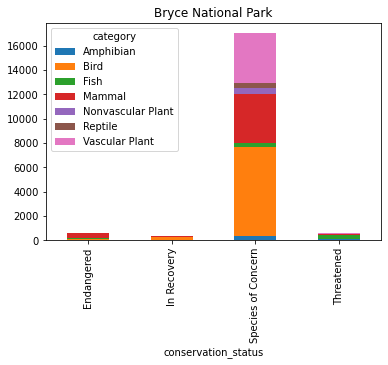

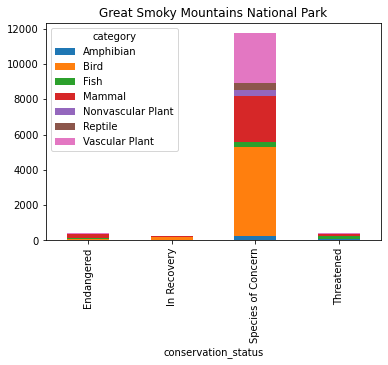

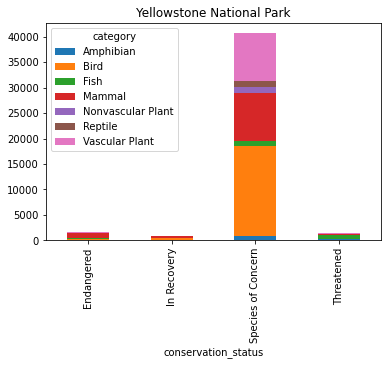

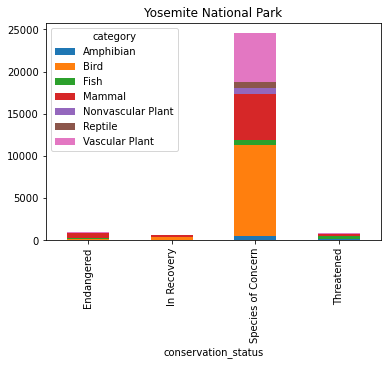

In [103]:
import pdb


# now we are going to create a graphic similar to the first one only its going to be for each park and it is
# going to actually portrey the number of individuals of each speacies in each conservation status for each park
parks_list = parks_species_status_grouped.park_name.unique()
parks_dfs={}
for park in parks_list:
    parks_dfs[park] = parks_species_status_grouped[parks_species_status_grouped.park_name == park].drop('park_name',axis = 1)
    summary_species= parks_dfs[park].pivot(index = 'conservation_status', columns = 'category', values = 'observations')
    summary_species['conservation_status'] = summary_species.index
    print(parks_dfs[park])
    summary_species.plot(x='conservation_status', kind='bar', stacked=True, title=park)
    

    





In [130]:
# we are now going to analyse the whole table obs with the common names of each species to see what animals are the
# most common. 
import re

parks_species = obs.merge(species_info, how = 'inner', on = 'scientific_name').reset_index(drop = True)
print(parks_species.common_names.head(30))
parks_species['describing_words'] = parks_species['common_names'].str.replace(',',"")
parks_species['describing_words'] = list(parks_species['describing_words'].str.split())

for item in parks_species['describing_words']:
    item = list(dict.fromkeys(item))

print(parks_species.describing_words.head(30))

0     Purple Vetch, Reddish Tufted Vetch
1     Purple Vetch, Reddish Tufted Vetch
2     Purple Vetch, Reddish Tufted Vetch
3     Purple Vetch, Reddish Tufted Vetch
4                          American Mink
5                          American Mink
6                          American Mink
7                          American Mink
8                           Klamath Plum
9                           Klamath Plum
10                          Klamath Plum
11                          Klamath Plum
12                            Velvetleaf
13                            Velvetleaf
14                            Velvetleaf
15                            Velvetleaf
16                        Common Bluecup
17                        Common Bluecup
18                        Common Bluecup
19                        Common Bluecup
20                      Virginia Wildrye
21                      Virginia Wildrye
22                      Virginia Wildrye
23                      Virginia Wildrye
24              